# Assignment 3 - Data Analysis
# Topic: Analysis of patient comments about drug effects.
### Student ID: 45720908
### Student name: Fatema 




>## Intro
This project is about analysing the Drug Data provided in SAS Viya Learning platform for Drug Data. Throughout the project, we are going to answer specific questions using data visualisation tools. 
The programming language is Python 3. 


>## Project requirements 
To do our analysis, we need to import several packages:
- re - for regular expression handling
- glob - to find all the pathnames matching a specified pattern
- pandas - for data manipulation 
- seaborn - better visualisation
- matplotlib.pyplot - for plots 
- nltk - for natural language processing
- wordcloud - for text visualisation


In [6]:
import re
import glob 
import nltk
import pandas  as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from   nltk.corpus import stopwords
from   wordcloud import WordCloud, STOPWORDS 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


>## Data preparations 
> At first, we save all concepts provided in the project description and store then in three lists. 


In [7]:

filepath = 'SideEffectsConcept.txt'
with open(filepath) as fp:
    SideEffectConcept = [line.replace('CLASSIFIER:', '').replace('\n', '') for cnt, line in enumerate(fp)]
        
filepath = 'MedicationConcept.txt'
with open(filepath) as fp:
    MedicationConcept = [line.replace('CLASSIFIER:', '').replace('\n', '') for cnt, line in enumerate(fp)]

filepath = 'DosageConcept.txt'
with open(filepath) as fp:
    DosageConcept = [line.replace('REGEX:', '').replace('\n', '') for cnt, line in enumerate(fp)]


>Now that we have the concepts,  we read the documents file by files and apply the concepts on each document. The outcome of these operations is stored in the same raw as the text. Then we create a single Dataframe out of all entries. 

In [8]:
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)


Data = []
import glob 
for count , path in enumerate(glob.glob("DrugDest/*.txt")):
    f = open(path, "r")
    text = f.read()
    
    se_temp = []
    med_temp = []
    dose_temp = []
    stems = stemSentence(text)
    for se in SideEffectConcept:
        if text.lower().find(se.lower()) != -1:
            se_temp.append(se)
    for me in MedicationConcept:
        if text.lower().find(me.lower()) != -1:
            med_temp.append(me)            
    for do in DosageConcept:
        if re.findall(re.compile(do),text.lower()) != -1:
            for d in re.findall(re.compile(do),text.lower()):
                dose_temp.append(d)      
                
    entry = { 'Dosages' : dose_temp , 'SideEffects': se_temp , 'Medications': med_temp , 'document': text  , 'stemText' : stems}
    Data.append(entry)
    f.close()

# convert to data frame 
drag_Data = pd.DataFrame(Data)
drag_Data.head()

,Dosages,Medications,SideEffects,document,stemText
0,[],[],[],Was on med for 2 1/2 yrs...Seemed to help at f...,wa on med for 2 1/2 yr ... seem to help at fir...
1,[],[],[],this medicine has lifted the cloud i had hangi...,thi medicin ha lift the cloud i had hang over me
2,[],[],[],"This med worked great from day 1. However, wi...","thi med work great from day 1 . howev , within..."
3,[],[],"[Nightmares, Weight gain]",I have been on the medication for a long time ...,I have been on the medic for a long time and I...
4,[300 mg],"[Cenerol, Ecstapin, Escalan, Exulactin]",[],I was on 300 mg of Ecstapin for a year after t...,I wa on 300 mg of ecstapin for a year after ta...


>### Task 1 - How many documents mention a medication, or a dosage, or a side effect?
To answer this question, we need to set the counter in iterate over the data frame and collect results. As we can see from the bar chart, medications have the highest number of documents mentioned in, followed side effects by then dosages. It could be because not every medicine has side effects.  Also, it could be because we were not able to specify all types of side effects. 


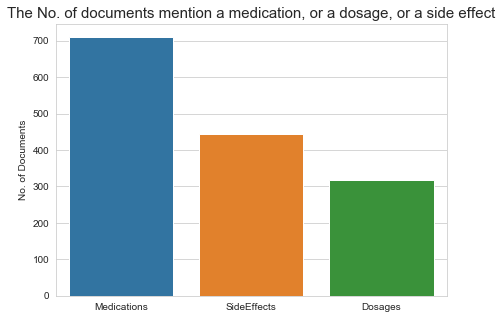

In [63]:
dosecounter , sidecounter, medcounter= 0,0,0

for row in range(len(drag_Data)):
    if len(drag_Data.loc[row,"Medications"]) > 0:
        medcounter = medcounter+1
             
    if len(drag_Data.loc[row,"SideEffects"]) > 0:
        sidecounter = sidecounter+1

    if len(drag_Data.loc[row,"Dosages"]) > 0:
        dosecounter = dosecounter+1

d = {'concept': ['Medications', 'SideEffects'  , 'Dosages' ], 'mentions': [medcounter ,sidecounter ,dosecounter ]} 
f, ax = plt.subplots(1, 1, figsize=(7, 5))

plot  = sns.barplot(x=d['concept'], y=d['mentions'], ax=ax)
plot.set_title("The No. of documents mention a medication, or a dosage, or a side effect",fontsize=15)
sns.set_style("whitegrid")
ax.set_ylabel("No. of Documents")
plt.savefig('q1.png' , dpi = 300)




>### Task 2 (3 marks) - How many documents mention each medication?
- Abidal
- Cenerol
- Ecstapin
- Fortifex
- Prexifan

>The bar chart shows the number of documents mention each medication. We can see that ABIDAL and Escaptin have the highest number of occurrence with a count of around 300. Follow by that we can see Prexifan has accoutred in over 100 documents. Fortifex has been mentioned as the least among this group. 


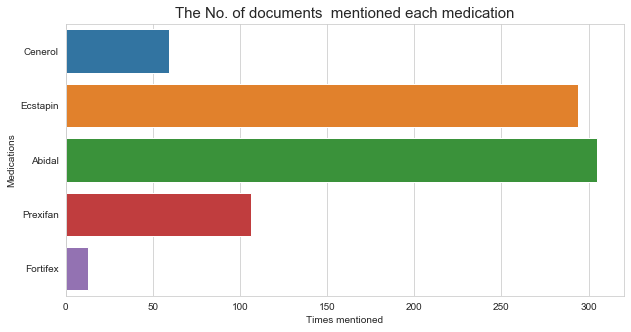

In [65]:
medc = []
for row in range(len(drag_Data)):
    for med in drag_Data.loc[row,"Medications"]:
        medc.append(med)

df = pd.DataFrame()
df['Medications'] = medc
df = df[(df.Medications == 'Abidal') | (df.Medications == 'Cenerol') | (df.Medications == 'Ecstapin')| 
        (df.Medications == 'Fortifex')| (df.Medications == 'Prexifan')]


f, ax = plt.subplots(1, 1, figsize=(10, 5))
plot  = sns.countplot(y='Medications', data=df , label='big')
ax.set_ylabel("Medications")
ax.set_xlabel("Times mentioned")
sns.set_style("whitegrid")
plot.set_title("The No. of documents  mentioned each medication",fontsize=15)
plt.xticks(rotation=0)
plt.savefig('q2.png' , dpi = 300)


>### Task 3 (5 marks) - Which medications are associated with sleep issues?
To determine sleep issues, we extracted sleep issues from a recognised website such as WebMD and Sleep Education Organisation. Our target to look up for these extracted words among the document is to find the associated medicines. 
We used the following sleeping disorders to find which medicines are associated with it. 
- sleep
- apnea
- insomnia
- hypersomnia
- night terror
- nightmare
- sleepwalk
- sleep paralysis
- snoring
- oversleep
- sleepless
- sleepness
- parasomnias
- sleep movement
- narcolepsy
- nap
- sopor
- excessive sleep’
- sleepy

>Abidal, Ecstapin, and Prexifan are highly associated with topics related to sleeping issues while Bifentan and Reniculex have the least amount of association.


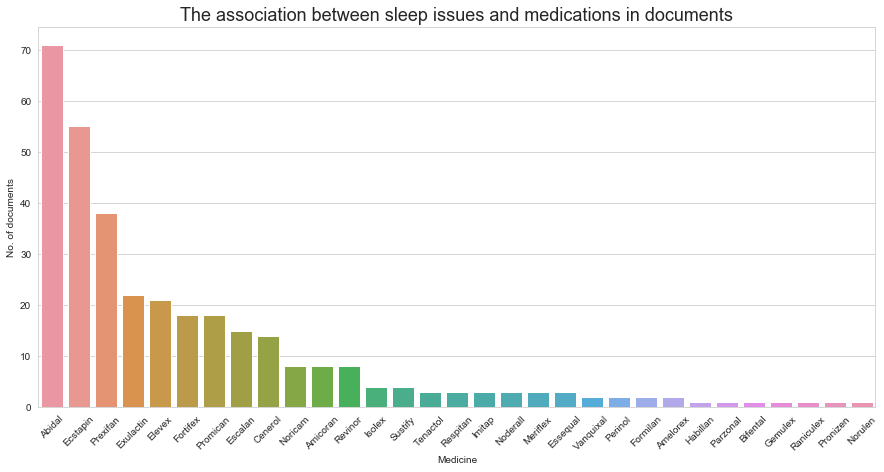

In [67]:

Sleep_disorders = ['sleep' ,'apnea' ,'insomnia' ,'hypersomnia' ,'night terror' ,'nightmare' ,'sleepwalk' 
,'sleep paralysis' ,'snoring' ,'oversleep' ,'sleepless','sleepness','parasomnias','sleep movement' ,'narcolepsy'
,'nap','sopor' ,'excessive sleepines' ,'sleepines','sleepy']

sleep_associated_medicines = []
for row in range(len(drag_Data)):
    for disorder in Sleep_disorders:
        if drag_Data.loc[row,"stemText"].lower().find(disorder.lower()) != -1:
            for med in drag_Data.loc[row,"Medications"]:
                sleep_associated_medicines.append(med)

                
df = pd.DataFrame()
df['Medicine'] = sleep_associated_medicines
f, ax = plt.subplots(1, 1, figsize=(15, 7))
plot = sns.countplot(x='Medicine', data=df, ax=ax , label='big' , order = df['Medicine'].value_counts().index)
plot.set_title("The association between sleep issues and medications in documents",fontsize=18)
ax.set_ylabel("No. of documents")
sns.set_style("whitegrid")
plt.xticks(rotation=45 ,label='big' )
plt.savefig('q3.png' , dpi = 300)

>### Task 4 (5 marks) - What are the most common concerns expressed?
To find out the most common concerns, we made a list of word and synonyms that express about being worried and anxtuos in the following listing: 
- anxiety
- fear
- worry
- distress
- unease
- apprehension
- misgiving
- disquiet
- concern 

>Moreover, we used stopwords from nltk and wordcloud packages.  Stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. The word cloud is a data visualisation technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.  
As for analysing, we can find out what patients are most concerned about the side effects of the medicines they take. Also, we can see that weight gain, depression, anxity, and withdrawn. 

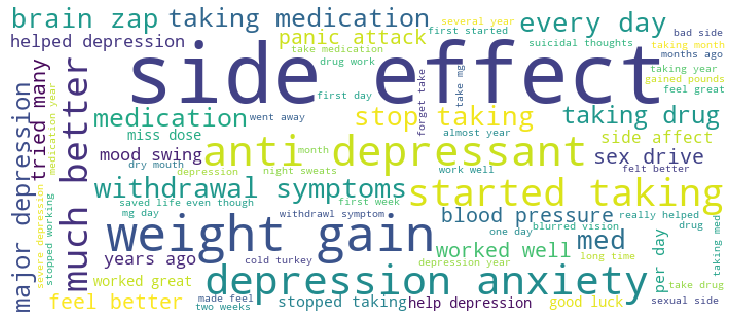

<Figure size 432x288 with 0 Axes>

In [76]:
concerns = ['anxiety', 'fear', 'worry', 'distress', 'unease', 'apprehension', 'misgiving', 'disquiet', 'concern']  

def stemSentence(sentence):
    porter = PorterStemmer()
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

  
comment_words = ' '
users_with_invites_ids_set = set(str(x) for x in MedicationConcept)
stopwordss = set(STOPWORDS).union(set(stopwords.words('english')) ).union(users_with_invites_ids_set)

# iterate through the csv file 
for val in drag_Data.document:     
    # typecaste each val to string 
    val = str(val)
    for concern in concerns:
        if val.lower().find(concern):
            # split the value
            tokens = val.split() 
            # Converts each token into lowercase 
            for i in range(len(tokens)): 
                tokens[i] = tokens[i].lower() 
            for words in tokens: 
                comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 700, height = 300, 
                background_color ='white', 
                stopwords = stopwordss, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 20)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show()
plt.savefig('q4.png' , dpi = 300)




# Task 5

Text(0.5, 1, 'The frency of Side effects throught the document ')

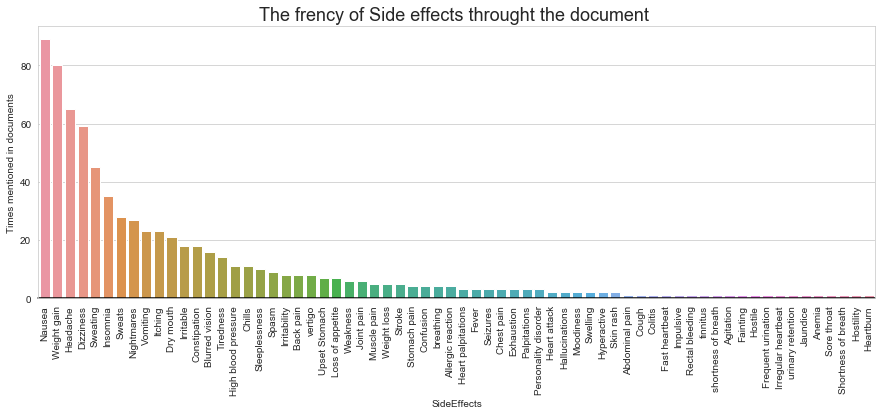

In [75]:
side_effect = []

for row in range(len(drag_Data)):
    if len(drag_Data.loc[row,"SideEffects"]) >  0:
        for item in drag_Data.loc[row,'SideEffects']:
            side_effect.append(item)


df = pd.DataFrame()
df['SideEffects'] = side_effect

f, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(x='SideEffects', data=df, ax=ax , label='big' , order = df['SideEffects'].value_counts().index)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Times mentioned in documents")
sns.set_style("whitegrid")
plt.xticks(rotation=90)
plt.savefig('q5.png' , dpi = 300)
plt.title("The frency of Side effects throught the document ",fontsize=18)


# Test and work 

In [ ]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()
#proide a word to be stemmed
print("Porter Stemmer")
print(porter.stem("cats"))
print(porter.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))
print("Lancaster Stemmer")
print(lancaster.stem("cats"))
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

In [ ]:
word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

In [ ]:
sentence="Pythoners are very intelligent and work very pythonly and now they are pythoning their way to success."
porter.stem(sentence)

In [ ]:
concerns = ['anxiety', 'fear', 'worry', 'distress', 'unease', 'apprehension', 'misgiving', 'disquiet', 'concern']  
from nltk.tokenize import sent_tokenize, word_tokenize

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

for row in range(len(drag_Data)):
    for concern in concerns:
        if(drag_Data.loc(raw,'document').lower().find(concern)
           
    x=stemSentence(sentence)
    print(x)

In [ ]:
concerns = ['anxiety', 'fear', 'worry', 'distress', 'unease', 'apprehension', 'misgiving', 'disquiet', 'concern']  

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

  
comment_words = ' '
users_with_invites_ids_set = set(str(x) for x in MedicationConcept)
stopwordss = set(STOPWORDS).union(set(stopwords.words('english')) ).union(users_with_invites_ids_set)

# iterate through the csv file 
for val in drag_Data.document:     
    # typecaste each val to string 
    val = str(val)
    for concern in concerns:
        if val.lower().find(concern):
            # split the value
            val = stemSentence(val)
            tokens = val.split() 
      
            # Converts each token into lowercase 
            for i in range(len(tokens)): 
                tokens[i] = tokens[i].lower() 
          
            for words in tokens: 
                comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 700, height = 300, 
                background_color ='white', 
                stopwords = stopwordss, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 20), facecolor = 'b') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()




In [ ]:
# from wordcloud import WordCloud, STOPWORDS 
# import matplotlib.pyplot as plt 
# import pandas as pd 
# import nltk
# from nltk.corpus import stopwords
 
    
# concerns = ['anxiety', 'fear', 'worry', 'distress', 'unease', 'apprehension', 'misgiving', 'disquiet', 'concern']  


# df = drag_Data
  
# comment_words = ' '
# users_with_invites_ids_set = set(str(x) for x in MedicationConcept)
# stopwordss = set(STOPWORDS).union(set(stopwords.words('english')) ).union(users_with_invites_ids_set)
# print(len(stopwordss))

# # iterate through the csv file 
# for val in df.document:     
#     # typecaste each val to string 
#     val = str(val) 
  
#     # split the value 
#     tokens = val.split() 
      
#     # Converts each token into lowercase 
#     for i in range(len(tokens)): 
#         tokens[i] = tokens[i].lower() 
          
#     for words in tokens: 
#         comment_words = comment_words + words + ' '
  
  
# wordcloud = WordCloud(width = 600, height = 300, 
#                 background_color ='white', 
#                 stopwords = stopwordss, 
#                 min_font_size = 10).generate(comment_words) 
  
# # plot the WordCloud image                        
# plt.figure(figsize = (8, 20), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show()



In [ ]:
# drag_Data.insert(1, "Dosages", object) 
# drag_Data.insert(2, "SideEffects", object) 
# drag_Data.insert(3, "Medications", object) 

# for row in range(len(drag_Data)):
#     se_temp = []
#     med_temp = []
#     dose_temp = []
#     for se in SideEffectConcept:
#         if drag_Data.loc[row,"document"].lower().find(se.lower()) != -1:
#             se_temp.append(se)
#     for me in MedicationConcept:
#         if drag_Data.loc[row,"document"].lower().find(me.lower()) != -1:
#             med_temp.append(me)            
#     for do in DosageConcept:
#         if re.findall(re.compile(do),drag_Data.loc[row,"document"].lower()) != -1:
#             for d in re.findall(re.compile(do),drag_Data.loc[row,"document"].lower()):
#                 dose_temp.append(d)      

#     drag_Data.loc[row,"Dosages"]     =   dose_temp
#     drag_Data.loc[row,"SideEffects"] =   se_temp
#     drag_Data.loc[row,"Medications"] =   med_temp

# drag_Data.head()

In [ ]:
# med_sleep_iss = {} 

# for row in range(len(drag_Data)):
#     if drag_Data.loc[row,"sleep_issus"]> 0:
#         if len (drag_Data.loc[row,'Medications']) > 0 : 
#             for item in drag_Data.loc[row,'Medications']:
#                 if item in med_sleep_iss:
#                     med_sleep_iss[item]  = med_sleep_iss[item]+drag_Data.loc[row,"sleep_issus"]
#                 else:
#                     med_sleep_iss[item] = drag_Data.loc[row,"sleep_issus"]
    
# med_sleep_iss